# Comparative Analysis of Hemoglobin Beta (HBB) Protein in Human and Chimpanzee

## Introduction
Hemoglobin beta (HBB) is a critical component of hemoglobin, the oxygen-carrying protein in red blood cells.
Even small variations in HBB can cause diseases like sickle-cell anemia.  
Humans and chimpanzees share ~98–99% of their DNA, making HBB an ideal candidate to study evolutionary conservation.


**Objective:**  
- Fetch HBB mRNA sequences from NCBI (Human & Chimpanzee).  
- Extract and translate the coding sequence (CDS) into protein.  
- Analyze amino acid composition.  
- Compare Human and Chimpanzee HBB proteins.  


## Step1. Import Libraries

In [1]:
# BioPython → for sequence fetching & parsing
from Bio import Entrez, SeqIO

# Counter → for amino acid frequency
from collections import Counter

# pandas → for data tables
import pandas as pd

# matplotlib → for visualization
import matplotlib.pyplot as plt

# numpy → for bar chart alignment
import numpy as np

# Always provide email for NCBI Entrez
Entrez.email = "sreekantyadav84@gmail.com"


## Step2. Fetching mRNA sequence for Human

Fetching the Human HBB sequence provides a baseline for understanding protein structure and function, while fetching the Chimpanzee HBB sequence allows us to compare across species. Since humans and chimpanzees share a close evolutionary relationship, this comparison can reveal how conserved this gene is between the two species.

In [ ]:
# Fetch Human HBB (NM_000518.5)
handle = Entrez.efetch(db="nucleotide", id="NM_000518.5", rettype="gb", retmode="text")
human_record = SeqIO.read(handle, "genbank")
handle.close()

## Why we need CDS
GenBank records contain both coding (CDS) and non-coding regions.
To analyze the functional protein, we must extract only the coding DNA sequence (CDS) and translate it into amino acids.
Directly translating the full mRNA sequence (with 5’ and 3’ UTRs) would give incorrect results, so focusing on the CDS ensures we get the exact functional protein sequence.

In [3]:
# Extract CDS
human_cds = None
for feature in human_record.features:
    if feature.type == "CDS":
      human_cds = feature
      break
human_seq = human_cds.extract(human_record.seq)

# Adjust codon_start if needed
codon_start = int(human_cds.qualifiers.get("codon_start", ["1"])[0])
if codon_start in (2, 3):
    human_seq = human_seq[(codon_start - 1):]

# Translate into protein
table = int(human_cds.qualifiers.get("transl_table", ["1"])[0])
human_protein = human_seq.translate(table=table, to_stop=True)

# save as Fasta format
with open("human_HBB_protein.fasta", "w")as f:
    f.write(f">human_HBB_protein \n {human_protein}")

print("✅ Human HBB length:", len(human_protein), "aa")
print(human_protein)


✅ Human HBB length: 147 aa
MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKVKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH


##  Fetching mRNA sequence for Chimpanzee

In [4]:
# Fetch Chimpanzee HBB (XM_508242.5)
handle = Entrez.efetch(db="nucleotide", id="XM_508242.5", rettype="gb", retmode="text")
chimp_record = SeqIO.read(handle, "genbank")
handle.close()

# Extract CDS
chimp_cds = None
for feature in chimp_record.features:
    if feature.type == "CDS":
      chimp_cds = feature
      break
chimp_seq = chimp_cds.extract(chimp_record.seq)

# Adjust codon_start
codon_start = int(chimp_cds.qualifiers.get("codon_start", ["1"])[0])
if codon_start in (2, 3):
    chimp_seq = chimp_seq[(codon_start - 1):]

# Translate
table = int(chimp_cds.qualifiers.get("transl_table", ["1"])[0])
chimp_protein = chimp_seq.translate(table=table, to_stop=True)

print("✅ Chimpanzee HBB length:", len(chimp_protein), "aa")
print(chimp_protein)


✅ Chimpanzee HBB length: 147 aa
MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKVKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH


## Step3. Amino acid composition of Human HBB

Amino acid composition gives us a fingerprint of a protein.
It shows how often each amino acid occurs and can provide insights into:
    Stability (hydrophobic vs. hydrophilic residues)
    Functional regions (charged or polar residues)
    Similarities or differences between homologous proteins.
This is one of the simplest but most fundamental ways to compare proteins.

In [5]:
# count amino acids
aa_counts = Counter(human_protein)

# convert into DataFrame
aa_df = pd.DataFrame.from_dict(aa_counts, orient= "index", columns = ["Count"])  

aa_df = aa_df.reset_index()
aa_df.columns =["amino acid", "count"]

# saving as csv format
aa_df.to_csv("Human_HBB_amino_acid_counts.csv", index = False) 

# reloading csv file
human_df = pd.read_csv("Human_HBB_amino_acid_counts.csv")
print(human_df.head())


  amino acid  count
0          M      2
1          V     18
2          H      9
3          L     18
4          T      7


## Amino acid composition of Chimpanzee

In [6]:
Chimp_aa_counts = Counter(chimp_protein)
aa_df =pd.DataFrame.from_dict(Chimp_aa_counts, orient ="index", columns = ["Count"])
aa_df= aa_df.reset_index()
aa_df.columns = ["Amino acid" , "Count"]
aa_df.to_csv("Chimpanzee_HBB_amino_acid_counts.csv", index = False)
Chimpanzee_df =pd.read_csv("Chimpanzee_HBB_amino_acid_counts.csv")
print(Chimpanzee_df.head())

  Amino acid  Count
0          M      2
1          V     18
2          H      9
3          L     18
4          T      7


## Step4. Comparison between Human and Chimpanzee Amino acid composition

In [8]:
human_counts = Counter(human_protein)
chimp_counts = Counter(chimp_protein)

# Put into Comparison DataFrame
df_compare = pd.DataFrame({"Human": human_counts, "Chimpanzee": chimp_counts}).fillna(0).astype(int)

# Save the table to CSV format
df_compare.to_csv("HBB_aa_comparison.csv")
print("✅ Comparison saved to HBB_aa_comparison.csv")
print(df_compare.head())

✅ Comparison saved to HBB_aa_comparison.csv
   Human  Chimpanzee
M      2           2
V     18          18
H      9           9
L     18          18
T      7           7


## Step5. Visualization

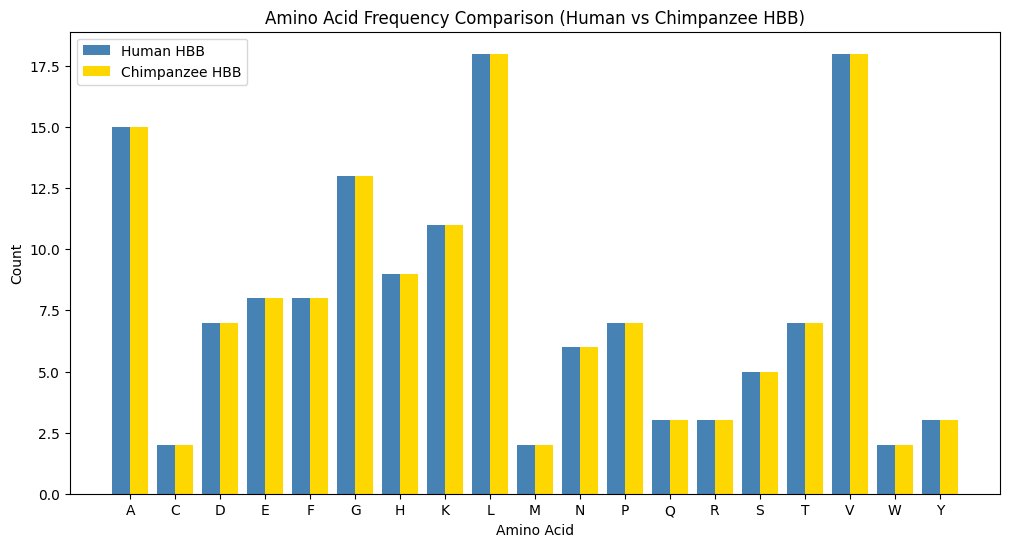

In [9]:
# Side-by-side bar plot
amino_acids = sorted(df_compare.index)         # sorted amino acids
human_counts = [df_compare.loc[aa, "Human"] for aa in amino_acids]
chimp_counts = [df_compare.loc[aa, "Chimpanzee"] for aa in amino_acids]

x = np.arange(len(amino_acids))     # x positions
width = 0.4     # bar width

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, human_counts, width, label="Human HBB", color="steelblue")
plt.bar(x + width/2, chimp_counts, width, label="Chimpanzee HBB", color="gold")

plt.xticks(x, amino_acids)
plt.title("Amino Acid Frequency Comparison (Human vs Chimpanzee HBB)")
plt.xlabel("Amino Acid")
plt.ylabel("Count")
plt.savefig("HBB_Human_vs_Chimpanzee_amino_acid_comparison(side_by_side)", dpi = 300, bbox_inches = "tight")
plt.legend()
plt.show()   

Both bars for an amino acid are almost the same height, it means that amino acid occurs with nearly the same frequency in both species.

## Step6. Results & Discussion

- Both Human and Chimpanzee HBB proteins are **147 amino acids long**, showing strong evolutionary conservation.  
- Amino acid composition analysis revealed nearly identical profiles, confirming high sequence similarity.  
- This reflects the close evolutionary relationship between humans and chimpanzees (~98–99% genome identity).  

The project demonstrates how **bioinformatics pipelines** can extract, translate, and compare genes/proteins from public databases.


## Step7. Conclusion

This mini-project highlights the practical workflow for comparative genomics:  
1. Fetch sequence data from NCBI.  
2. Extract CDS and translate into protein.  
3. Perform amino acid composition analysis.  
4. Compare orthologous proteins across species.  

Such approaches form the foundation of **molecular evolution studies**, with applications in medicine, genetics, and biotechnology.

**Future Work:**  
We can extend this analysis by:
- Performing BLAST alignment of Human vs Chimpanzee HBB sequences.
- Including other primates (e.g., gorilla, macaque) for phylogenetic comparison.

## References
NCBI GenBank (https://www.ncbi.nlm.nih.gov/),
Biopython Documentation (https://biopython.org/)